In [11]:
import pandas as pd
import io

# A more complete dataset provided as a string
csv_data = """CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72
11,Male,67,19,14
12,Female,35,19,99
13,Female,58,20,15
14,Female,24,20,77
15,Male,37,20,13
16,Male,22,20,79
17,Female,35,21,35
18,Male,20,21,66
19,Male,52,23,29
20,Female,35,23,98
"""

# Read the string data into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_data))

print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
# Select the two features we'll use for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Data ready for clustering:")
print(X.head())

Data ready for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [13]:
from sklearn.cluster import KMeans

# Create the model, telling it to find 4 clusters
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [14]:
# Get the cluster labels for each customer
labels = model.labels_

# Add the labels as a new 'cluster' column in our DataFrame
df['cluster'] = labels

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        3  
1        2  
2        1  
3        2  
4        3  


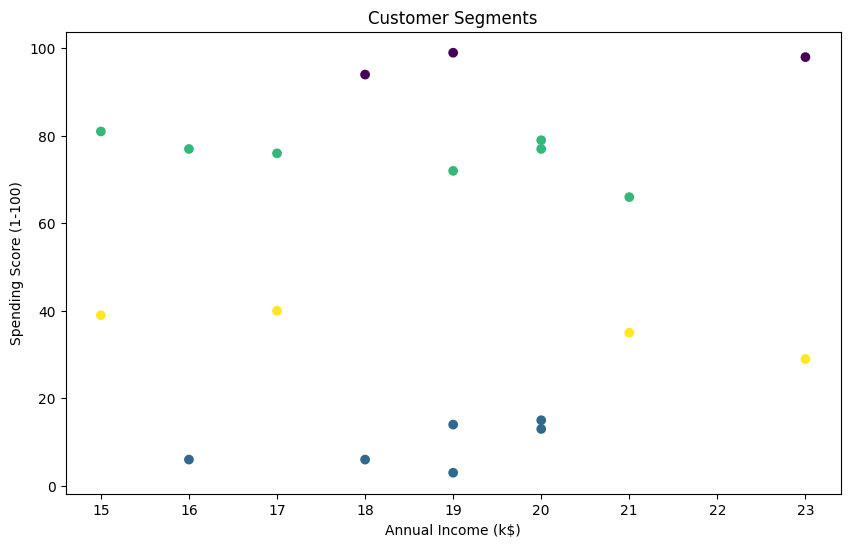

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['cluster'])
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()